In [3]:
import numpy as np
class AdalineGD(object) :
    '''
    适应性线性神经元分类算法
    eta : float,  学习率, 0~1
    n_iter : int, 迭代次数
    w_ : 权重向量
    cost_ : 神经网络的分类代价
    '''
    
    def __init__(self, eta=0.1, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
        pass
    
    def fit(self, X, y) :
        '''神经网络输入训练样本训练模型'''
        # 初始化
        self.w_ = np.zeros(1+X.shape[1])
        self.cost_ = []
        # 训练
        for i in range(self.n_iter) :
            output = self.net_input(X) # 一维向量，长度为2
            errors = y - output  
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta*errors.sum()*1
            cost = (errors ** 2).sum() / 2.0 # ** 是python中特有的数学运算符号，表示 x的y次幂运算
            self.cost_.append(cost)
            pass
        return self
        pass
    
    def net_input(self, X) :
        '''神经网路输入函数'''
        return np.dot(X, self.w_[1:]) + self.w_[0]
        pass
    
    def activation(self, x):
        '''激活函数'''
        return x
        pass
    
    def predict(self, x):
        '''预测函数，只是对activation函数的输出进行分类判断'''
        return np.where(x>=0.0, 1, -1)
        pass
    pass    

4.3 7.0
1.0 5.1
(205, 135) [[4.3  4.32 4.34 ... 6.94 6.96 6.98]
 [4.3  4.32 4.34 ... 6.94 6.96 6.98]
 [4.3  4.32 4.34 ... 6.94 6.96 6.98]
 ...
 [4.3  4.32 4.34 ... 6.94 6.96 6.98]
 [4.3  4.32 4.34 ... 6.94 6.96 6.98]
 [4.3  4.32 4.34 ... 6.94 6.96 6.98]]
(205, 135) [[1.   1.   1.   ... 1.   1.   1.  ]
 [1.02 1.02 1.02 ... 1.02 1.02 1.02]
 [1.04 1.04 1.04 ... 1.04 1.04 1.04]
 ...
 [5.04 5.04 5.04 ... 5.04 5.04 5.04]
 [5.06 5.06 5.06 ... 5.06 5.06 5.06]
 [5.08 5.08 5.08 ... 5.08 5.08 5.08]]
分类结果  (27675,)


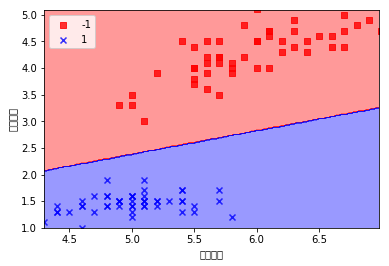

In [5]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_decision_region(X, y, classifier, resolution=0.2):
    markers = ('s','x','o','v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x_min,x_max = X[:,0].min(),X[:,0].max()
    y_min,y_max = X[:,1].min(),X[:,1].max()
    print(x_min, x_max)
    print(y_min, y_max)
    # 扩展成一个二维向量
    xx1, xx2 = np.meshgrid(np.arange(x_min, x_max,resolution), 
                           np.arange(y_min, y_max,resolution))
    print(xx1.shape, xx1)
    print(xx2.shape, xx2)
    # 预测
    z = classifier.predict(classifier.activation(classifier.net_input(np.array([xx1.ravel(), xx2.ravel()]).T)))
    print("分类结果 ", z.shape)
    z = z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)
        pass
    pass

# 读取文件，并将数据可视化处理
file = "/home/gt/Documents/dataset/iris/iris.data"
df = pd.read_csv(file, header = None)
# df.head(10)

# 抽取前100行数据的第4列
y = df.loc[0:99, 4].values
# 将字符串转换成int数字
y = np.where(y == 'Iris-setosa', 1, -1)
# print(y.shape)

# 抽取前100行数据的第0列和第2列作为输入数据
X = df.iloc[0:100, [0, 2]].values
# print(X.shape)
# 画出X
# plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
# plt.scatter(X[50:100, 0], X[50:100, 1], color="blue", marker="x", label="versicolor")
# plt.xlabel("花瓣长度")
# plt.ylabel("花径长度")
# plt.legend("upper left")

# 将样本数据输入感知器
adlGD = AdalineGD(eta = 0.0001, n_iter = 50)
adlGD.fit(X, y) # 训练
# plt.plot(range(1, len(adlGD.cost_) + 1), adlGD.cost_,marker="o") #　绘制出错曲线
# plt.xlabel("iteration")
# plt.ylabel("cost")
# plt.show()

plot_decision_region(X,y,adlGD,resolution=0.02)
plt.xlabel("花径长度")
plt.ylabel("花瓣长度")
plt.legend(loc="upper left")
plt.show()
